In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
pd.set_option('max_colwidth', 800)

## 1. Understand the Problem Statement

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

## 2. Tweets Preprocessing and Cleaning

In [7]:
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [8]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [19]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


#### A) Removing Twitter Handles (@users)

In [79]:
combination = train.append(test, ignore_index=True)
combination.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation


In [80]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [81]:
combination['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combination[['tweet', 'tidy_tweet']].head()

,tweet,tidy_tweet
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,factsguide: society now #motivation,factsguide: society now #motivation


#### B) Removing Punctuations, Numbers, and Special Characters

In [82]:
combination['tidy_tweet'] = combination['tidy_tweet'].str.replace('[^a-zA-Z#]', ' ')
combination[['tweet', 'tidy_tweet']].head()

,tweet,tidy_tweet
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,factsguide: society now #motivation,factsguide society now #motivation


#### C) Removing Short Words

In [83]:
word_length = 3
combination['tidy_tweet'] = combination['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > word_length]))
combination[['tweet', 'tidy_tweet']].head()

,tweet,tidy_tweet
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,factsguide: society now #motivation,factsguide society #motivation


#### D) Tokenization

In [84]:
tokenized_tweet = combination['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

#### E) Stemming

In [85]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [86]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

#### Set Back Together!

In [87]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combination['tidy_tweet'] = tokenized_tweet
combination[['tweet', 'tidy_tweet']].head()

,tweet,tidy_tweet
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,bihday your majesty,bihday your majesti
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,factsguide: society now #motivation,factsguid societi #motiv


## 3. Story Generation and Visualization from Tweets

#### A) Understanding the common words used in the tweets

In [92]:
from wordcloud import WordCloud

In [88]:
all_words = ' '.join([text for text in combination['tidy_tweet']])

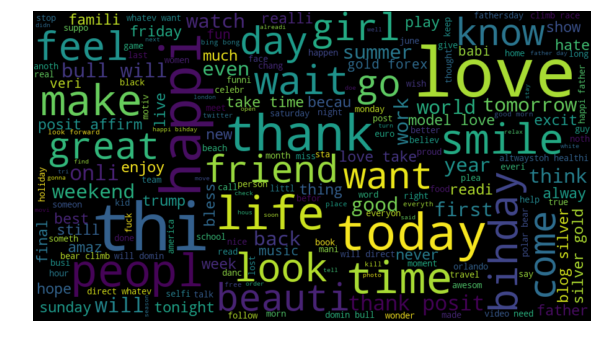

In [101]:
wordcloud = WordCloud(width=900, height=500, random_state=1904, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### B) Words in non racist/sexist tweets

In [99]:
normal_words =' '.join([text for text in combination['tidy_tweet'][combination['label'] == 0]])

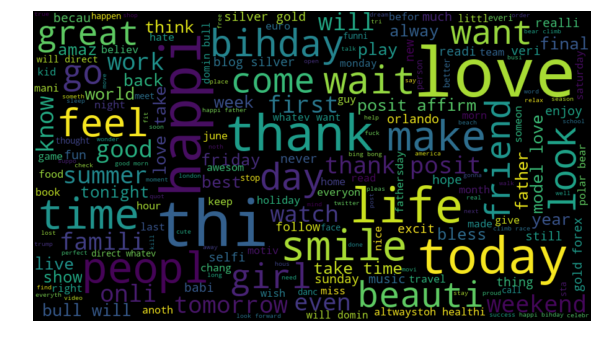

In [100]:
wordcloud = WordCloud(width=900, height=500, random_state=1904, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### C) Words in Racist/Sexist Tweets

In [102]:
negative_words = ' '.join([text for text in combination['tidy_tweet'][combination['label'] == 1]])

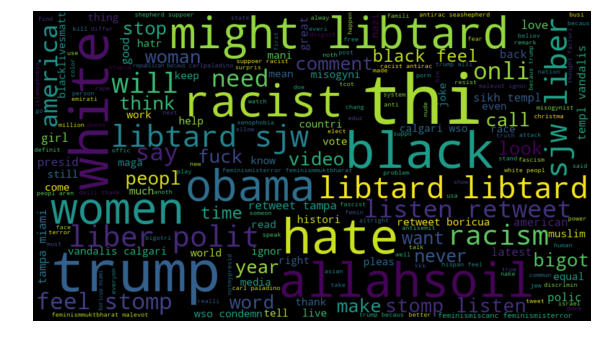

In [103]:
wordcloud = WordCloud(width=900, height=500, random_state=1904, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### D) Understanding the impact of Hashtags on tweets sentiment

In [105]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
        
    return hashtags

In [106]:
# extracting hashtags from non racist/sexist tweets
HT_normal = hashtag_extract(combination['tidy_tweet'][combination['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combination['tidy_tweet'][combination['label'] == 1])

# unnesting list
HT_normal = sum(HT_normal, [])
HT_negative = sum(HT_negative, [])

#### Non Racist/Sexist Words

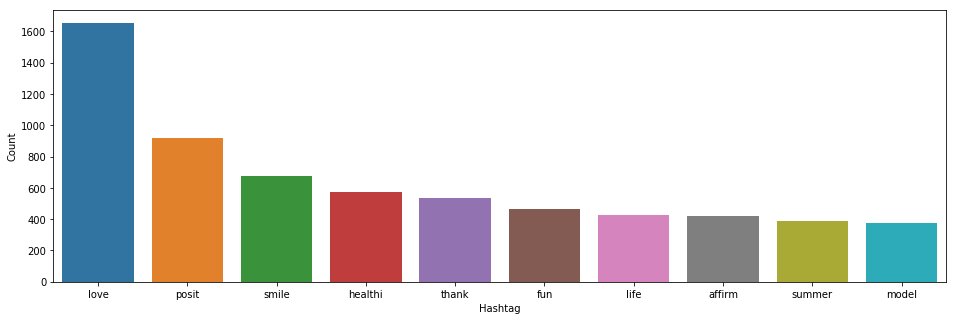

In [108]:
a = nltk.FreqDist(HT_normal)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

d = d.nlargest(columns='Count', n=10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x='Hashtag', y='Count')
ax.set(ylabel='Count')
plt.show()

#### Racist/Sexist Words

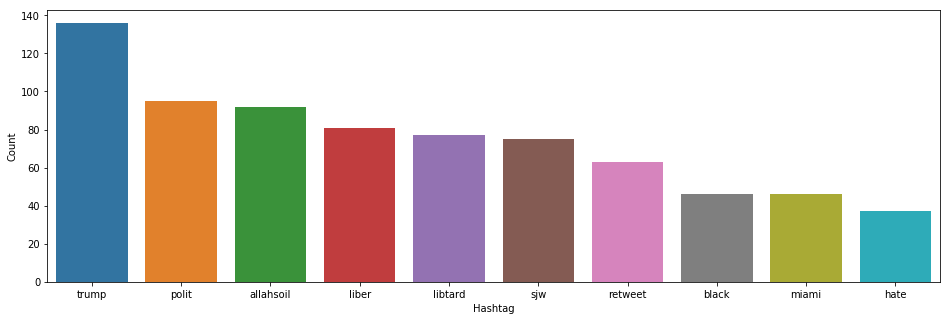

In [112]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

e = e.nlargest(columns='Count', n=10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x='Hashtag', y='Count')
ax.set(ylabel='Count')
plt.show()

## 4. Extracting Features from Cleaned Tweets

#### A) Bag-of-Words Features

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combination['tidy_tweet'])

#### B) TF-IDF Features

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combination['tidy_tweet'])

## 5. Model Building: Sentiment Analysis

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [133]:
lreg = LogisticRegression()

#### A) Using Bag-of-Words Features

In [134]:
# prepare data
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

In [135]:
# train the model
lreg.fit(xtrain_bow, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
# predict the valid data
prediction = lreg.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

In [137]:
# evaluate the model performance
f1_score(yvalid, prediction_int)

0.5307820299500832

In [138]:
# predict the test data
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) 

#### B) Using TF-IDF Features

In [139]:
# prepare data
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [140]:
# train the model
lreg.fit(xtrain_tfidf, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [141]:
# predict the valid data
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

In [142]:
# evaluate the model performance
f1_score(yvalid, prediction_int)

0.5446507515473032

In [143]:
# predict the test data
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_tfidf.csv', index=False) 

<hr/>